# JSBSim L-4S-5 Flight Recreation

Run the model in JSBSim and compare results to technical papers.

In [1]:
# dependencies
from numpy import loadtxt
import matplotlib.pyplot as plt
%matplotlib inline

blue = "#3366cc"
red = "#e31d1d"
green =  "#76e146"

# Historical data
columns = loadtxt('../data/traj_model_case_1_booster.csv', delimiter=',', unpack=True)
case_1_booster_d, case_1_booster_alt = columns
columns = loadtxt('../data/traj_model_case_2_booster.csv', delimiter=',', unpack=True)
case_2_booster_d, case_2_booster_alt = columns
columns = loadtxt('../data/traj_model_case_3_booster.csv', delimiter=',', unpack=True)
case_3_booster_d, case_3_booster_alt = columns
columns = loadtxt('../data/traj_model_case_1_stage1.csv', delimiter=',', unpack=True)
case_1_stage1_d, case_1_stage1_alt = columns
columns = loadtxt('../data/traj_model_case_2_stage1.csv', delimiter=',', unpack=True)
case_2_stage1_d, case_2_stage1_alt = columns
columns = loadtxt('../data/traj_model_case_3_stage1.csv', delimiter=',', unpack=True)
case_3_stage1_d, case_3_stage1_alt = columns

# Import sim data
columns = loadtxt("JSBSim/data.csv", delimiter=',', unpack=True, comments="T")

times              = columns[ 0]
MET                = columns[ 1]
altitudeMsl        = columns[ 2]
latitude           = columns[ 3]
longitude          = columns[ 4]
thrust             = columns[ 5] * 4.44822   # to newtons
total_mass         = columns[ 6] * 0.453592  # to kg
pitch              = columns[ 7]
ecei_vmag          = columns[ 8] * 0.3048    # to m/s
eci_vmag           = columns[ 9] * 0.3048    # to m/s
qbar               = columns[10] * 4.882e-4  # to kg/cm2
acc_u              = columns[11] * 0.3048    # to m/s2
acc_v              = columns[12] * 0.3048    # to m/s2
acc_w              = columns[13] * 0.3048    # to m/s2
downrange          = columns[14]
alpha              = columns[15]
roll_rate          = columns[16] * 57.2958   # to deg/s

## Mass Table

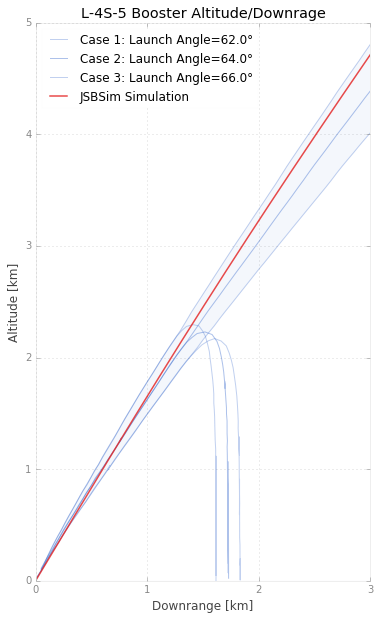

In [2]:
fig, ax1 = plt.subplots(figsize=(6,10))
plt.title(r"L-4S-5 Booster Altitude/Downrage")
plt.ylabel(r"Altitude [km]")
plt.xlabel(r"Downrange [km]")

#plt.fill_between(case_1_booster_d, 0, case_1_booster_alt, color=blue, alpha=0.10)
#plt.fill_between(case_3_booster_d, 0, case_3_booster_alt, color='white')
plt.fill_between(case_3_stage1_d, 0, case_3_stage1_alt, color=blue, alpha=0.05)
plt.fill_between(case_1_stage1_d, 0, case_1_stage1_alt, color='white')


plt.plot(case_1_booster_d, case_1_booster_alt, color=blue, lw=1, alpha=0.3, label=u"Case 1: Launch Angle=62.0°")
plt.plot(case_2_booster_d, case_2_booster_alt, color=blue, lw=1, alpha=0.4, label=u"Case 2: Launch Angle=64.0°")
plt.plot(case_3_booster_d, case_3_booster_alt, color=blue, lw=1, alpha=0.3, label=u"Case 3: Launch Angle=66.0°")
plt.plot(case_1_stage1_d, case_1_stage1_alt, color=blue, lw=1, alpha=0.3)
plt.plot(case_2_stage1_d, case_2_stage1_alt, color=blue, lw=1, alpha=0.4)
plt.plot(case_3_stage1_d, case_3_stage1_alt, color=blue, lw=1, alpha=0.3)

plt.plot(downrange/1000.0, (altitudeMsl)/1000.0, color=red, lw=1.5, alpha=0.8, label="JSBSim Simulation")


plt.axis('equal')
plt.ylim([0,5])
plt.xlim([0,3])
plt.xticks(range(4))
ax1.legend(loc=2)
plt.show()